In [ ]:
import os
import sys
sys.path.append(os.path.join('..', '..'))

from scripts.data_loaders.L2ARCTIC import L2ArcticDataset, all_arctic_speaker_splits
from scripts.data_loaders.CORAAL import CORAALDataset
from scripts.data_loaders.TIMIT import TIMITDataset

from scripts.language_identification.meta_fasttext import facebook_identify_language

import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import clear_output
clear_output()

In [32]:
suitcase = L2ArcticDataset(split='suitcase_corpus', include_speaker_info=True, include_text=True) # spontaneous speech
arcticScripted = all_arctic_speaker_splits(include_speaker_info=True, include_text=True)
coraal = CORAALDataset(split='ATL', include_speaker_info=True)
timit = TIMITDataset(split='test', include_speaker_info=True, include_text=True)
clear_output()

In [22]:
def plot_language_distribution(langs, dataset_name, detect_fn_name):
    plt.figure(figsize=(10, 5))
    plt.bar(langs.keys(), langs.values())
    plt.xlabel('Language')
    plt.ylabel('Number of samples')
    plt.title(f'Language distribution in {dataset_name} dataset using {detect_fn_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [34]:
coraal_lang_dist = {}
wrong_examples = []
for sample in coraal:
    df: pd.DataFrame = sample[0]
    for line in df[~df['Spkr'].str.contains('int') & ~df['Content'].str.startswith('(pause')]['Content']:
        if len(line.split(' ')) < 10:
            continue
        tag, prob = facebook_identify_language(line)
        coraal_lang_dist[tag] = coraal_lang_dist.get(tag, 0) + 1
        if tag != 'en':
            wrong_examples.append((tag, line))

In [35]:
wrong_examples

[('nn', "[I'm f- I'm finna] go to- I'm finna go to the store."),
 ('fr', 'plus minus, plus minus, plus minus, plus minus real fast.'),
 ('yue-Hant',
  "October, November, December, January, February, /March/- She's only four months."),
 ('it',
  'all Lakers. Kareem Abdul-Jabbar, all Lakers. Larry Bird, all Boston.'),
 ('ko-Hang',
  "Oxon Hill, Maryland. Go- y'all go check it out, man. Google 'em.")]

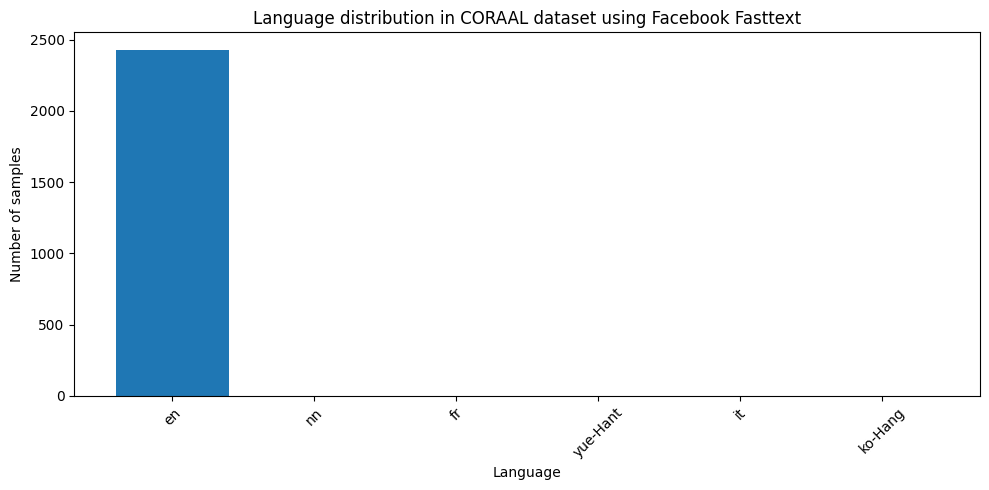

In [36]:
plot_language_distribution(coraal_lang_dist, 'CORAAL', 'Facebook Fasttext')

In [49]:
coraal_accuracy = coraal_lang_dist['en'] / sum(coraal_lang_dist.values())
coraal_accuracy

0.997946611909651

In [44]:
timit_lang_dist = {}
for sample in timit:
    text = sample[3]
    tag, prob = facebook_identify_language(text)
    timit_lang_dist[tag] = timit_lang_dist.get(tag, 0) + 1

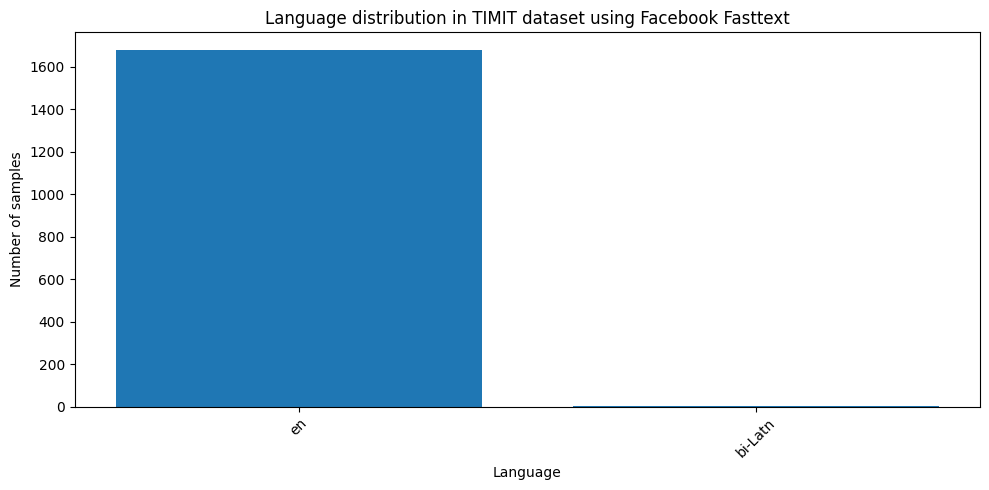

In [45]:
plot_language_distribution(timit_lang_dist, 'TIMIT', 'Facebook Fasttext')

In [50]:
timit_accuracy = timit_lang_dist['en'] / sum(timit_lang_dist.values())
timit_accuracy

0.9994047619047619

In [47]:
suitcase_lang_dist = {}
for sample in suitcase:
    text = sample[3]
    tag, prob = facebook_identify_language(text)
    suitcase_lang_dist[tag] = suitcase_lang_dist.get(tag, 0) + 1

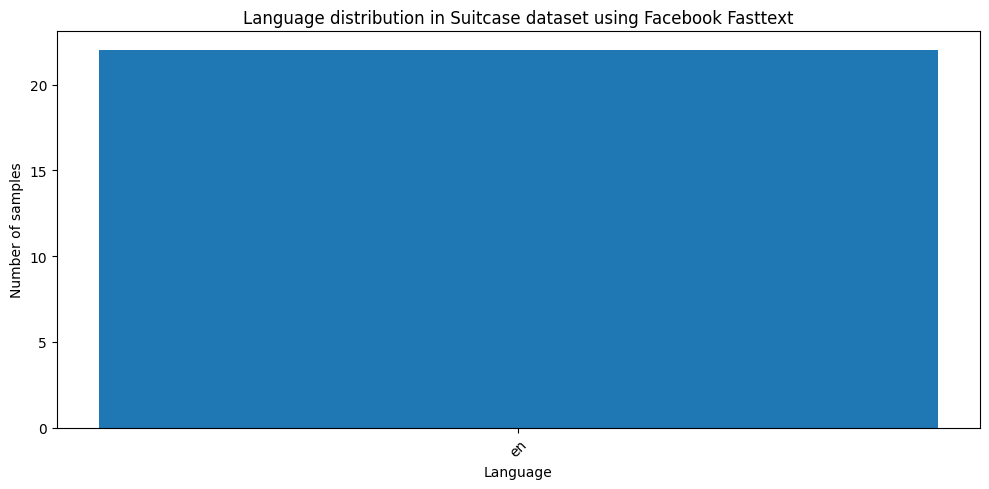

In [48]:
plot_language_distribution(suitcase_lang_dist, 'Suitcase', 'Facebook Fasttext')

In [52]:
suitcase_accuracy = suitcase_lang_dist['en'] / sum(suitcase_lang_dist.values())
suitcase_accuracy

1.0

In [53]:
arctic_lang_distribution = {}
for sample in arcticScripted:
    text = sample[3]
    tag, prob = facebook_identify_language(text)
    arctic_lang_distribution[tag] = arctic_lang_distribution.get(tag, 0) + 1

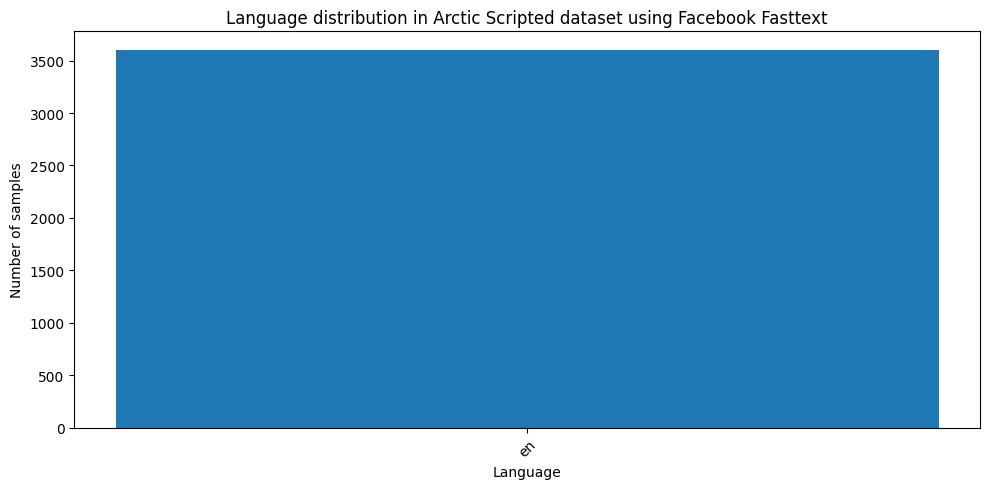

In [54]:
plot_language_distribution(arctic_lang_distribution, 'Arctic Scripted', 'Facebook Fasttext')

In [55]:
arctic_accuracy = arctic_lang_distribution['en'] / sum(arctic_lang_distribution.values())
arctic_accuracy

1.0

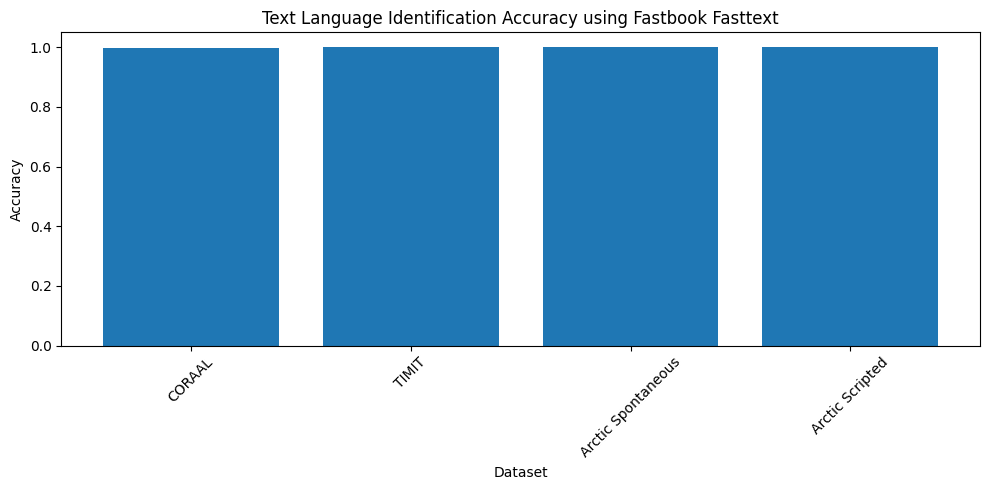

In [56]:
plt.figure(figsize=(10, 5))
plt.bar(['CORAAL', 'TIMIT', 'Arctic Spontaneous', 'Arctic Scripted'], [coraal_accuracy, timit_accuracy, suitcase_accuracy, arctic_accuracy])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title(f'Text Language Identification Accuracy using Fastbook Fasttext')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()